# Problem set for Spike Right to Swipe: Part 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# feel free to use this functions to make your plots look nicer :)
def set_font_size(ax, font_size, legend_font_size=None):
    """Set fontsize of all axis text objects to specified value."""

    texts = ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels())

    for text in texts:
        text.set_fontsize(font_size)

    if legend_font_size is None:
        legend_font_size = font_size

    legend = ax.get_legend()

    if legend:
        for text in legend.get_texts():
            text.set_fontsize(legend_font_size)

# 0. Warm up

A. To run computational anlayses we usually discretize continuous time into evenly spaced timesteps. What is the timestep size $\Delta t$ for a 1000 Hz sampling frequency? How many timesteps are needed to represent a 10-second time-series at 1000 Hz? A 50-second time-series at 500 Hz? Generate a 1-D time array for each case.

B. Given firing rate $r(t)$ and discretization time step $\Delta t$, what is the discretized probability of spiking as a function of time? Assume $\Delta t$ is small enough to never allow more than one spike per time step.

C. The histogram is a very common way of visualizing a distribution of samples. Generate three different samples of 1000 uniformly distributed random variables between 0 and 1, and make three corresponding histograms binning the results into 30 evenly spaced bins. Repeat for normally (Gaussian) distributed variables. (Hint: use the functions `np.random.uniform` and `np.random.normal`).

D. The notion of *covariance* is designed to capture how the variations in two random variables relate to one another. Mathematically, the covariance $C$ between $X$ and $Y$ is defined as $C(X, Y) = E[(X - E[X])(Y - E[Y])]$, where $E$ is the expectation. Explain in your own words how this equation captures how two variables do/do not covary.

## A
For a 1000 Hz sampling frequency, $\Delta t = 1/(1000 \textrm{ Hz}) = 1$ ms. For 10 s time-series at 1000 Hz, we need 10 s * 1000 Hz = 10,000 timesteps. For a 50 s time-series at 500 Hz we need 50 s * 500 Hz = 2500 timesteps. 

In [2]:
# 10 s 1000 Hz array
dt = 1/1000
t = np.arange(0, 10, dt)

# 50 s 500 Hz array
dt = 1/500
t = np.arange(0, 50, dt)

## B

For a constant firing rate $r(t) = r_0$ the average number of spikes in a window of duration $T$ is $r_0T$. Assuming a time-varying firing rate $r(t)$ that varies more slowly than $\Delta t$, the average number of spikes in a time bin at $t$ is approximately $r(t)\Delta t$. When the random variable is a binary event, the average number of events is equivalent to the event probability, so $p_{spk}(t) = r(t)\Delta t$. A good rule of thumb if you forget is to check the units. $r(t)$ is in Hz and $\Delta t$ is in seconds, so their product gives unitless probability.

## C

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


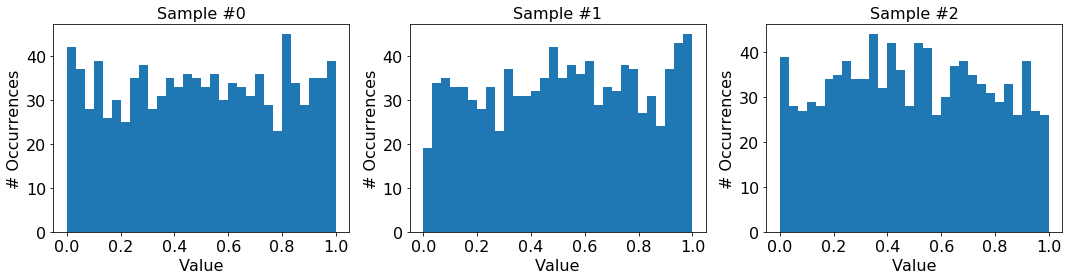

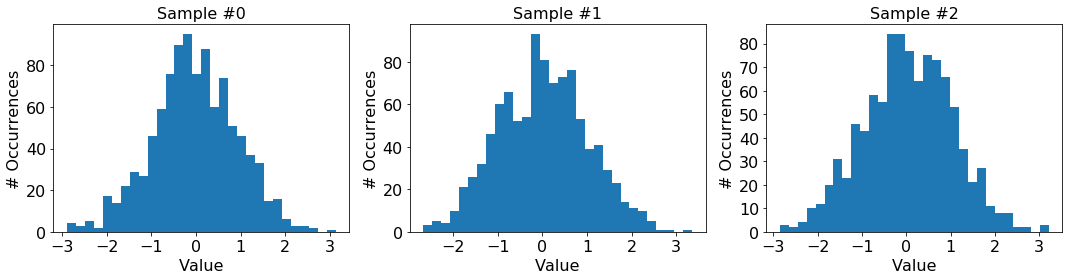

In [3]:
# uniform variables
fig, axs = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)  # tight_layout makes text line up correctly

for ctr, ax in enumerate(axs):
    # take sample
    x = np.random.uniform(0, 1, 1000)
    
    # plot sample
    ax.hist(x, bins=30)
    
    ax.set_xlabel('Value')
    ax.set_ylabel('# Occurrences')
    
    ax.set_title('Sample #' + str(ctr))
    
for ax in axs:
    set_font_size(ax, 16)
    
# normal variables
fig, axs = plt.subplots(1, 3, figsize=(15, 4), tight_layout=True)  # tight_layout makes text line up correctly

for ctr, ax in enumerate(axs):
    # take sample
    x = np.random.normal(0, 1, 1000)
    
    # plot sample
    ax.hist(x, bins=30)
    
    ax.set_xlabel('Value')
    ax.set_ylabel('# Occurrences')
    
    ax.set_title('Sample #' + str(ctr))
    
for ax in axs:
    set_font_size(ax, 16)

## D
The covariance equation $C(X,Y)$ gives the average product of the difference between two random variables $X$ and $Y$ from their means, $E[X]$ and $E[Y]$, respectively. If $X$ and $Y$ are usually both greater or both less than their means, then the product $(X - E[X])(Y - E[Y])$ will usually be positive, so the covariance will be positive. If $X$ is usually less than its mean when $Y$ is greater than its mean and vice versa, then $(X - E[X])(Y - E[Y])$ will usually be negative, so the covariance will be negative. If $X$ and $Y$ are completely independent of one another, then the covariance will be near zero.

# 1. Poisson spiking

A. Given constant firing rates 5 Hz, 10 Hz, or 30 Hz, generate a 200-second spike train using a 1000 Hz sampling frequency, with Poisson-distributed spike counts. Print out the total number of spikes generated at each rate over the 200 seconds. Plot a short sample of each spike train.

B. For each firing rate, count how many spikes are in each 1-second window (with 200 1-second windows total). For each firing rate, make a histogram of the results using integer bins. Print each histogram's mean and variance.

C. For each firing rate, compute the inter-spike interval distribution. Plot a histogram of the results in both original and log counts for each firing rate. (You can set an axis object's y-axis to log scale using `ax.set_yscale('log', nonposy='clip')`.) How does the mean of the inter-spike interval distribution relate to the firing rate?

## A

In [4]:
frs = [5, 10, 30]  # our firing rates (Hz)
dt = 1/1000  # sampling itvl (s)

t = np.arange(0, 200, dt)  # time array
spks_all = []  # to store all spk trains

for fr in frs:  # loop over firing rates
    
    p_spk = fr*dt  # spike prob in 1 time bin
    spks = np.random.rand(len(t)) < p_spk  # generate spike train
    
    spks_all.append(spks)  # save spks

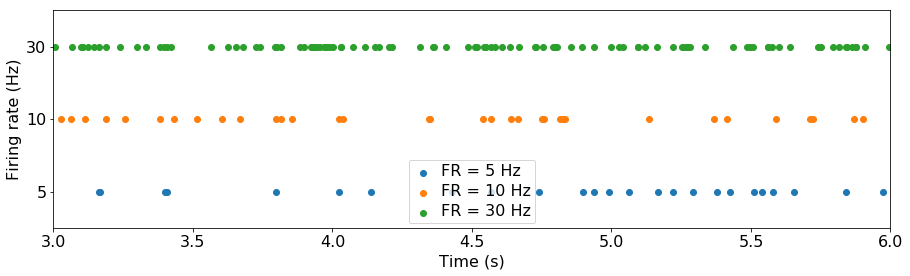

In [5]:
# spike train plots
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

for ctr, spks in enumerate(spks_all):
    ts_spk = np.nonzero(spks)[0] * dt  # get spk times
    
    # select small window to show (between 3 & 6 seconds)
    ts_spk_wdw = ts_spk[(3 <= ts_spk) & (ts_spk < 6)]
    
    # make scatter plot of spike times
    ax.scatter(ts_spk_wdw, ctr*np.ones(len(ts_spk_wdw)))

# clean up and label plot
ax.set_xlim(3, 6)
ax.set_ylim(-.5, 2.5)

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(frs)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Firing rate (Hz)')

ax.legend(['FR = ' + str(fr) + ' Hz' for fr in frs])

set_font_size(ax, 16)

In [6]:
# print spk counts for each fr

for fr, spks in zip(frs, spks_all):
    print('Total 200 sec spk ct = ', np.sum(spks))

Total 200 sec spk ct =  1028
Total 200 sec spk ct =  2012
Total 200 sec spk ct =  5996


## B

Max counts =  [12, 19, 45]
Mean spk ct for FR =  5 Hz: 5.17
Var spk ct for FR =  5 Hz: 4.6011
Mean spk ct for FR =  10 Hz: 10.34
Var spk ct for FR =  10 Hz: 9.4044
Mean spk ct for FR =  30 Hz: 30.38
Var spk ct for FR =  30 Hz: 32.0356


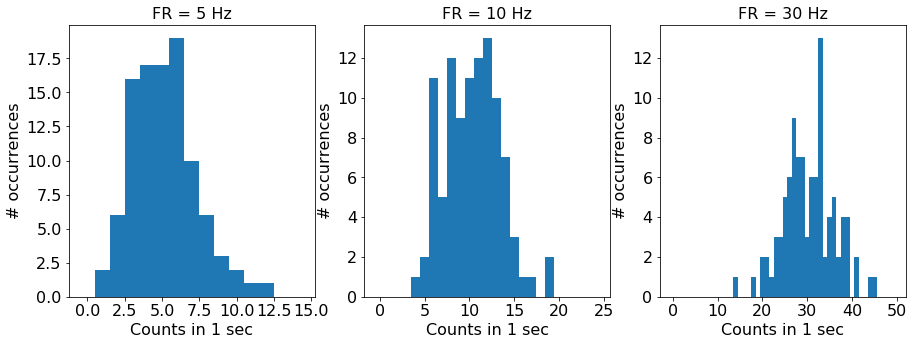

In [7]:
# spike count distributions
cts = [[], [], []]  # where we'll store spk counts for each firing rate

for fr_ctr, spks in enumerate(spks_all):  # loop over spike trains from diff firing rates
    for wdw_start in range(0, 100):  # loop over nonoverlapping 1 second intervals
        wdw_end = wdw_start + 1  # window end
        
        # get spike count in this wdw
        ct = np.sum(spks[(wdw_start <= t) & (t < wdw_end)])
        
        # save for later
        cts[fr_ctr].append(ct)
        
# print out max counts so we can make sure to include enough bins
print('Max counts = ', [np.max(cts_) for cts_ in cts])
cts_max = [15, 25, 50]  # upper bound on max counts for setting hist bins

# plot stuff
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# loop over spk count distributions, maxes, firing rates, and axis objects
for cts_, ct_max, fr, ax in zip(cts, cts_max, frs, axs):
    
    # make bins for hist
    bins = -0.5 + np.arange(0, ct_max+1)
    
    # make hist
    ax.hist(cts_, bins=bins)
    
    # set title and print stuff
    ax.set_title('FR = ' + str(fr) + ' Hz')
    
    print('Mean spk ct for FR = ', str(fr), 'Hz:', np.mean(cts_))
    print('Var spk ct for FR = ', str(fr), 'Hz:', np.var(cts_))
    
# clean up plots
for ax in axs:
    ax.set_xlabel('Counts in 1 sec')
    ax.set_ylabel('# occurrences')
    
    set_font_size(ax, 16)

## C

Mean ISI for FR =  5 Hz: 0.194197663096
Mean ISI for FR =  10 Hz: 0.0994172053705
Mean ISI for FR =  30 Hz: 0.0333541284404


/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


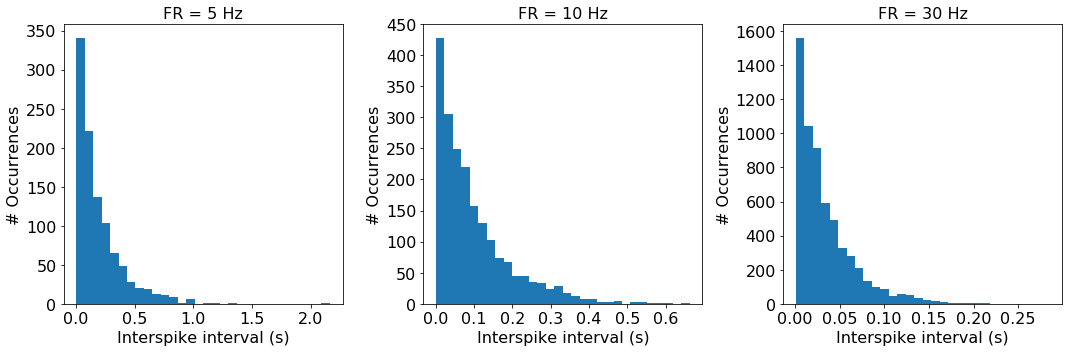

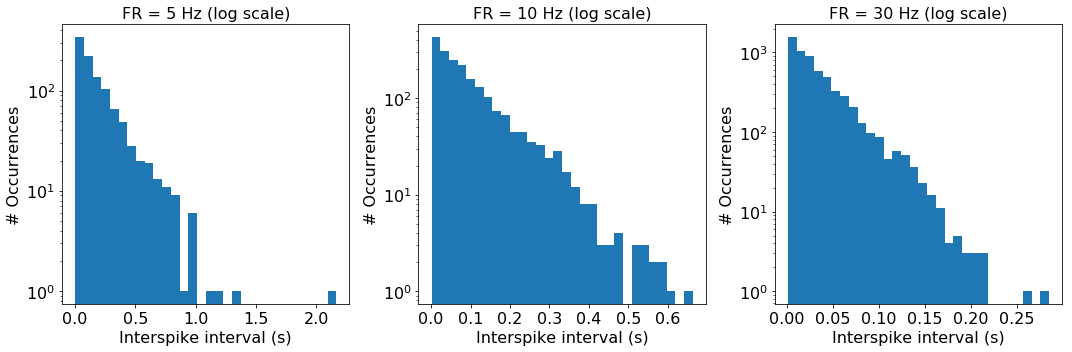

In [8]:
# interspike intervals
isis_all = []

for spks in spks_all:  # loop over diff fr's spk trains
    # get all spk times
    ts_spk = dt * np.nonzero(spks)[0]
    
    # take diff btwn next spk and prev spk
    prev_spks = ts_spk[:-1]  # all but last spk time
    next_spks = ts_spk[1:]  # all but first spk time
    isis = next_spks - prev_spks  # diff
    
    isis_all.append(isis)  # store
    
# make isi histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

# loop over firing rate, isi, and axis object
for fr, isis, ax in zip(frs, isis_all, axs):
    # plot hist
    ax.hist(isis, bins=30)
    
    # label and print stuff
    ax.set_title('FR = ' + str(fr) + ' Hz')
    
    print('Mean ISI for FR = ', fr, 'Hz:', np.mean(isis))

# clean up plots
for ax in axs:
    ax.set_xlabel('Interspike interval (s)')
    ax.set_ylabel('# Occurrences')
    
    set_font_size(ax, 16)
    
# plot log plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)

for fr, isis, ax in zip(frs, isis_all, axs):
    ax.hist(isis, bins=30)
    ax.set_yscale('log', nonposy='clip')
    ax.set_title('FR = ' + str(fr) + ' Hz (log scale)')
    
for ax in axs:
    ax.set_xlabel('Interspike interval (s)')
    ax.set_ylabel('# Occurrences')
    
    set_font_size(ax, 16)

For Poisson-distributed spikes, the mean ISI is the reciprocal of the firing rate.

# 2. Tuning curves

Here you will make a tuning curve of a model neuron's spiking responses to different stimuli.

Suppose the spike train in the file `motion_spks.npy` was recorded from a cortical neuron while an animal was shown a bar moving in any one of sixteen directions 0°, 22.5, 45°, ... 337.5°. Assume stimuli were presented for 1 second each in random order, with 25 repetitions per stimulus (for 400 stim presentations total), and with a 1 second interstimulus interval. The resulting spike train is given in the 1-D binary array `spks`, recorded at 1000 Hz; and the dictionary `stim` contains the start times for each stim presentation. The variable `thetas` contains a list of the 16 angles. The variable `t` contains an array of timestamps.

A. For each stimulus direction, make a raster plot and PSTH showing the neuron's response to the stimulus. Include 1 s prior to stimulus onset and 1 s post stimulus offset, for a 3 second raster or PSTH in total. Does the neuron's response appear to depend on the bar angle?

B. Use these results to construct a tuning curve showing the mean firing rate response to each stimulus (in Hz, time-averaged over the 1-second presentation), as well as the standard deviation of the response (use the function `ax.errorbar`). Write 1-2 sentences describing the neuron's tuning curve.

## A

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


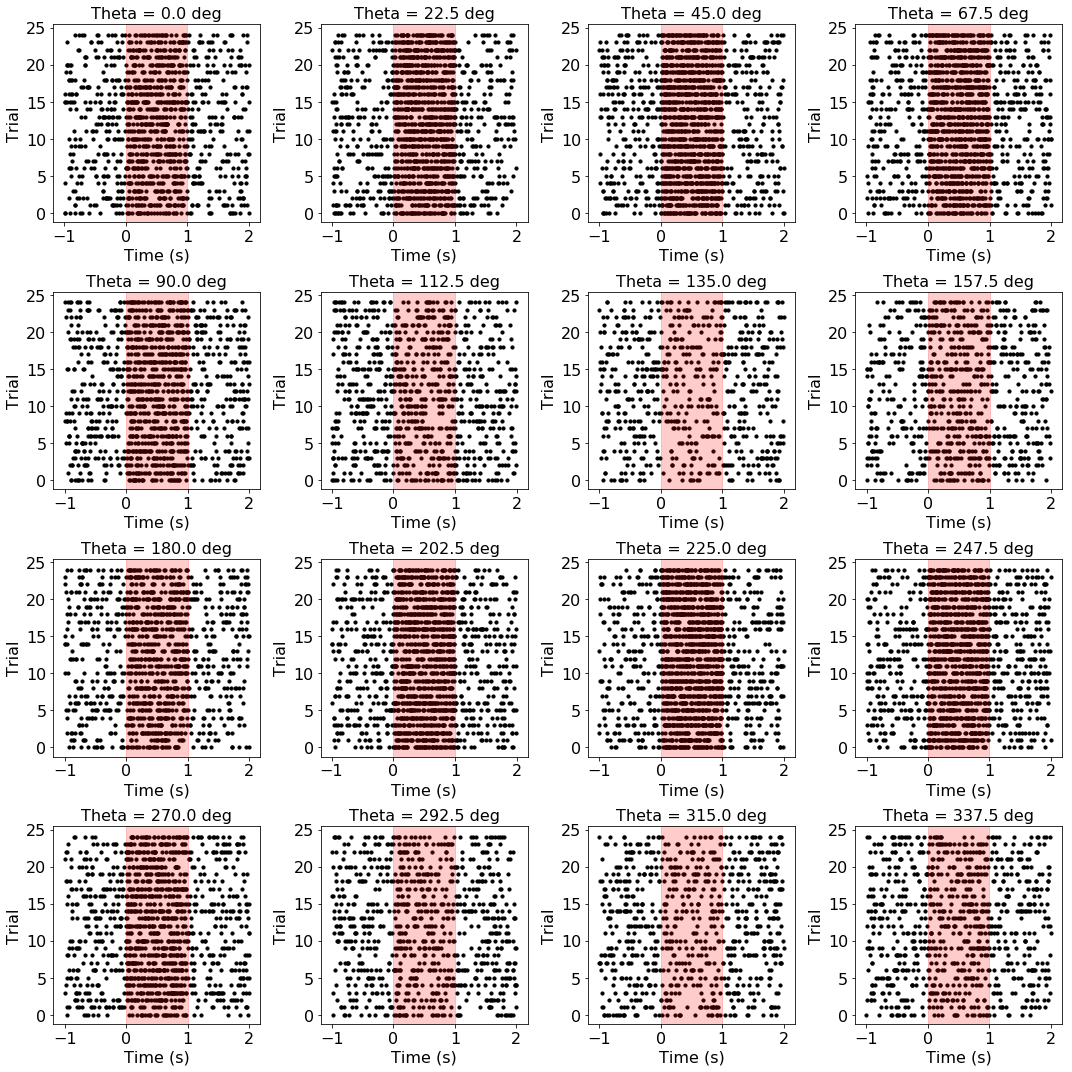

In [9]:
dt = 1/1000  # timestep size

# load data
data = np.load('motion_spks.npy')[0]

t = data['t']
thetas = data['thetas']
stims = data['stims']
spks = data['spks']

# set up plots
fig, axs = plt.subplots(4, 4, figsize=(15, 15), tight_layout=True)

spks_theta_all = []  # to store spk train arrays for all thetas

# loop over stim angles
for theta, ax in zip(thetas, axs.flat):
    
    # array for storing 3000 timestep spk train for each stim presentation
    spks_theta = np.zeros((25, 3000), dtype=bool)
    
    # get all spks surrounding stim starts for this angle
    for ctr, start in enumerate(stims[theta]):
        t_idx_start = int(start/dt)  # time idx of stim presentation
        
        # get spks 1 s before and 1 s after stim
        spks_stim = spks[t_idx_start-1000:t_idx_start+2000]
        
        # store spk train
        spks_theta[ctr] = spks_stim
    
    # make raster plot
    for ctr, spks_ in enumerate(spks_theta):  # loop over stim presentations
        ts_spk = -1 + np.nonzero(spks_)[0] * dt  # get spk times
        
        # plot spk times
        ax.scatter(ts_spk, ctr * np.ones(len(ts_spk)), c='k', s=10)
    
    # store
    spks_theta_all.append(spks_theta)
    
    ax.axvspan(0, 1, color='r', alpha=0.2)  # shade time of stim
    ax.set_title('Theta = ' + str(theta) + ' deg')
    
# label/clean up plots
for ax in axs.flat:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Trial')
    set_font_size(ax, 16)

/Users/melete/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


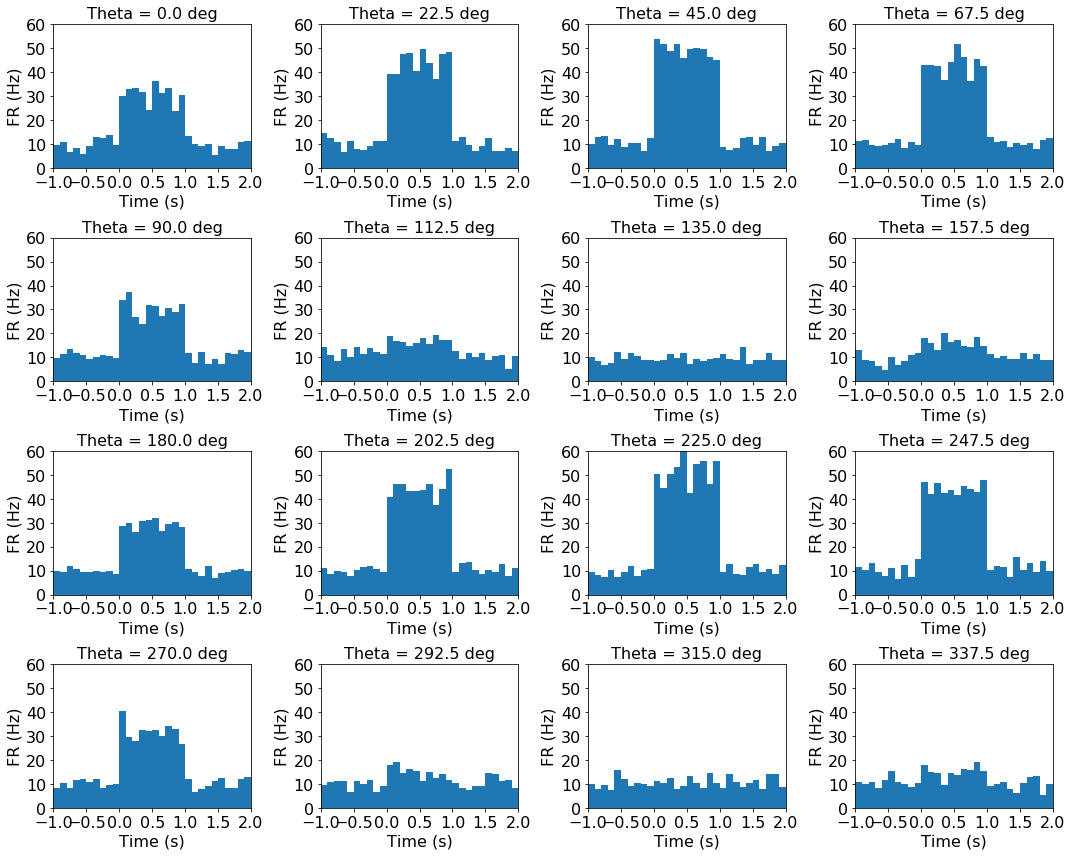

In [10]:
# PSTHs
fig, axs = plt.subplots(4, 4, figsize=(15, 12), tight_layout=True)
bins = np.linspace(-1, 2, 31)  # 100 ms bins
t_psth = np.arange(-1, 2, dt)  # time vec for PSTH

frs_theta_trial_mean = []  # to store means
frs_theta_trial_std = []  # to store stds

# loop over angles, spk trains, and axis objects
for theta, spks_theta, ax in zip(thetas, spks_theta_all, axs.flat):
    
    # loop over time bins
    frs_theta = []  # to store firing rate for each time bin for this theta
    
    for start, end in zip(bins[:-1], bins[1:]):
        # get mask for this time bin
        t_mask = (start <= t_psth) & (t_psth < end)
        
        # get all trials' spks in this time bin
        spks_t_bin = spks_theta[:, t_mask]
        
        # count spks over time bin and divide by bin width to get fr for each trial
        frs_t_bin = np.sum(spks_t_bin, axis=1) / 0.1
        
        # average over trials
        frs_t_bin_mean = np.mean(frs_t_bin)
        
        # store
        frs_theta.append(frs_t_bin_mean)
        
    # plot
    ax.bar(bins[:-1], frs_theta, width=.1, align='edge')
    
    ax.set_xlim(-1, 2)
    ax.set_ylim(0, 60)
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('FR (Hz)')
    ax.set_title('Theta = ' + str(theta) + ' deg')
    
    # get total avg firing rate for this trial
    frs_theta_trial = np.sum(spks_theta[:, 1000:2000], axis=1)
    
    frs_theta_trial_mean.append(np.mean(frs_theta_trial))
    frs_theta_trial_std.append(np.std(frs_theta_trial))
    
for ax in axs.flat:
    set_font_size(ax, 16)

Yes, the neuron's firing rate appears to depend on the direction of the bar.

## B

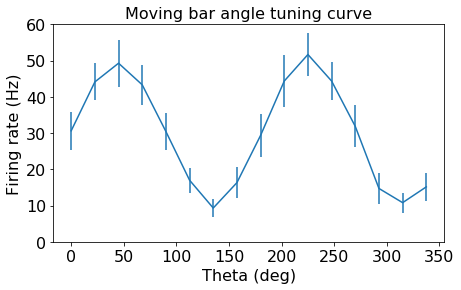

In [11]:
# plot tuning curve
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.errorbar(thetas, frs_theta_trial_mean, yerr=frs_theta_trial_std)

ax.set_ylim(0, 60)

ax.set_xlabel('Theta (deg)')
ax.set_ylabel('Firing rate (Hz)')
ax.set_title('Moving bar angle tuning curve')

set_font_size(ax, 16)

This neuron responds strongly to motion in either the +45 or +225 degree direction. It is therefore perhaps orientation selective, but not direction selective.